In [1]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
random_file_name="./blues.00000.wav"

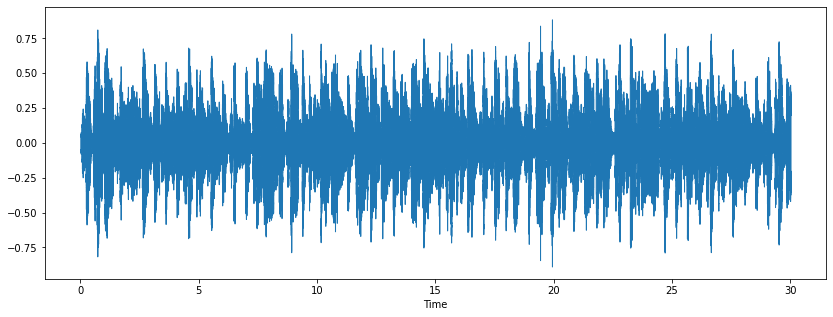

In [3]:
x,sr=librosa.load(random_file_name,sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(x,sr=sr)

In [4]:
from IPython.display import Audio
Audio (data=x,rate=sr)

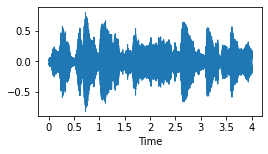

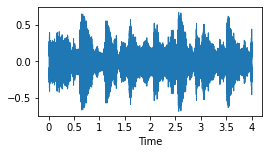

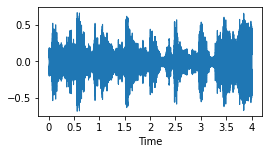

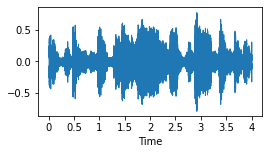

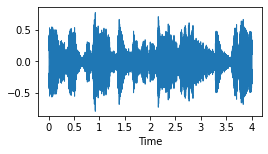

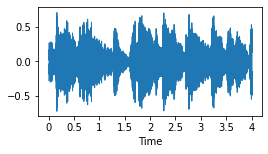

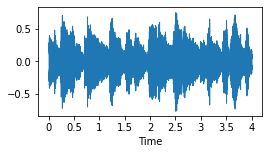

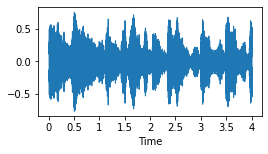

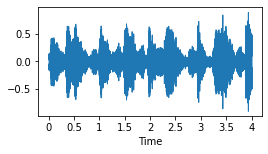

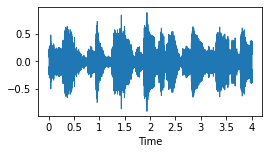

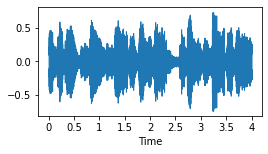

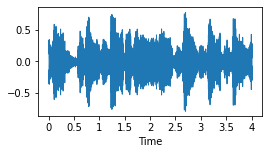

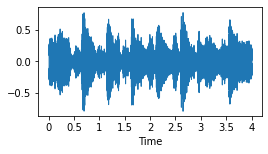

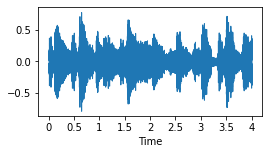

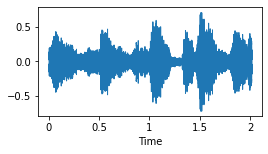

In [5]:
audio_path="./blues.00000.wav"
y,sr=librosa.load(audio_path,sr=None) #sr=None to keep the orignal sampling rate

#Define the duration of each chunk and overlap 
chunk_duration = 4
overlap_duration =2 

#convert duration to samples
chunk_samples=chunk_duration*sr
overlap_samples=overlap_duration*sr

#caluclate the number of chunks 
num_chunks=int(np.ceil((len(y)-chunk_samples)/(chunk_samples - overlap_samples))) +1

#iterate over chunks
for i in range (num_chunks):
    start=i * (chunk_samples - overlap_samples)
    end = start +chunk_samples

    chunk=y[start:end]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

#### Melspectogram Visualization

In [6]:
#plotting melspectogram for entire audio 
def plot_melspectogram(y,sr):
    spectogram=librosa.feature.melspectrogram(y=y,sr=sr)
    spectogram_db=librosa.power_to_db(spectogram,reg=np.max)
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectogram')
    plt.tight_layout()
    plt.show()

In [7]:
def plot_mel_spectogram_chunks(y,sr):
    #Define the duration of each chunk and overlap 
    chunk_duration = 4
    overlap_duration =2 

    #convert duration to samples
    chunk_samples=chunk_duration*sr
    overlap_samples=overlap_duration*sr

    #caluclate the number of chunks 
    num_chunks=int(np.ceil((len(y)-chunk_samples)/(chunk_samples - overlap_samples))) +1

    #iterate over chunks
    for i in range (num_chunks):
        start=i * (chunk_samples - overlap_samples)
        end = start +chunk_samples

        chunk=y[start:end]

        mel_spectogram=librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(mel_spectogram.shape)
        spectogram_db=librosa.power_to_db(mel_spectogram,ref=np.max)
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectogram')
        plt.tight_layout()
        plt.show()
        

(128, 173)


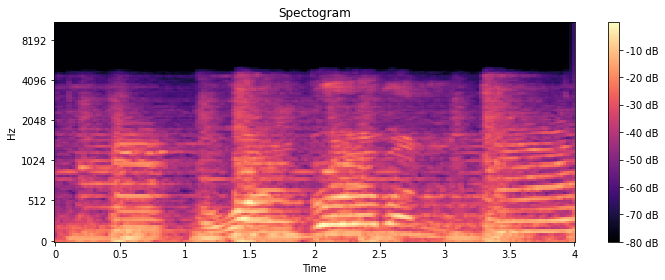

(128, 173)


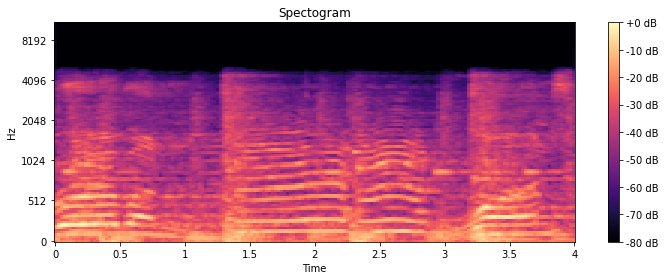

(128, 173)


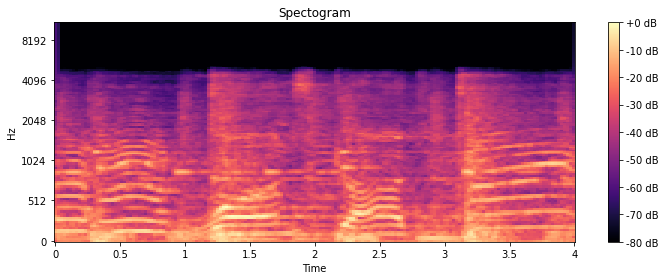

(128, 173)


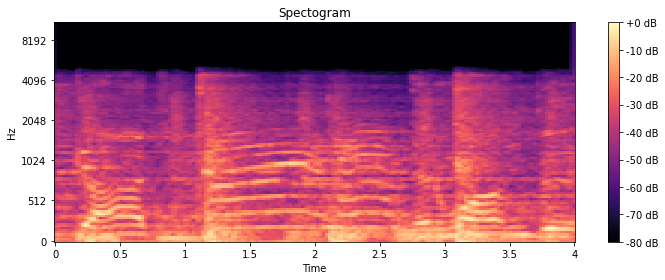

(128, 173)


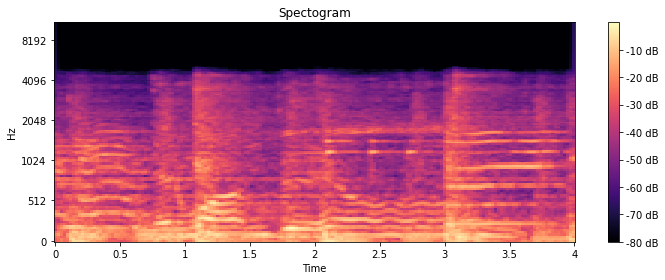

(128, 173)


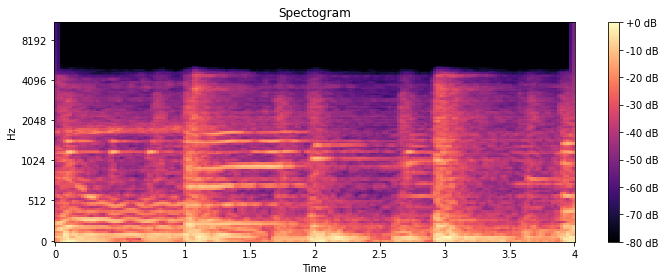

(128, 173)


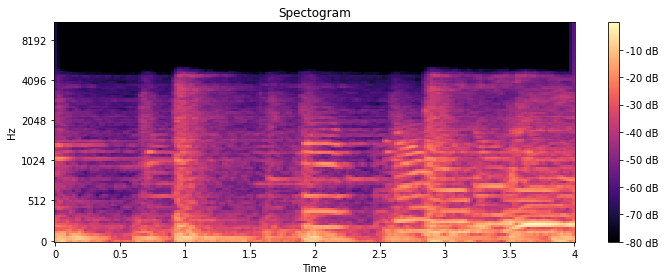

(128, 173)


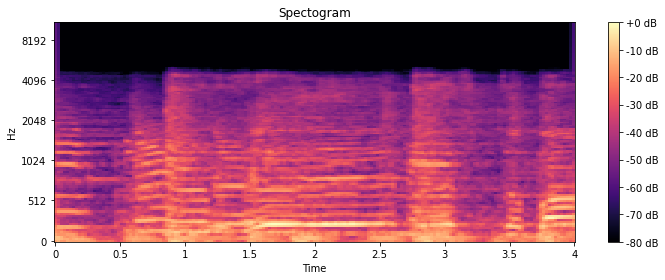

(128, 173)


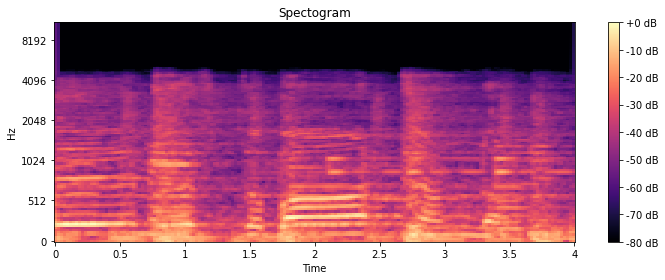

(128, 173)


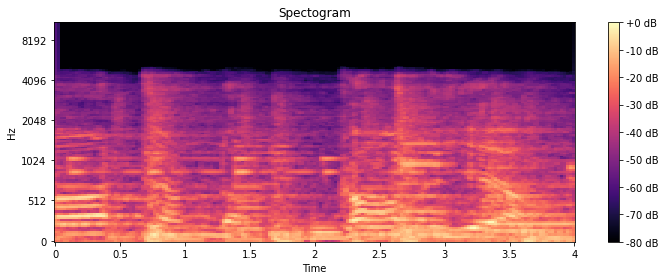

(128, 173)


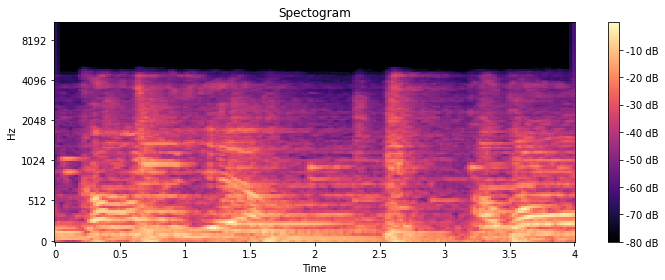

(128, 173)


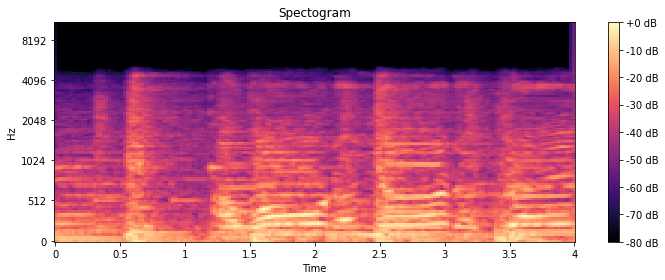

(128, 173)


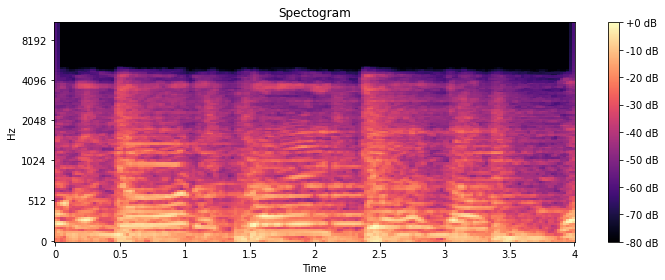

(128, 173)


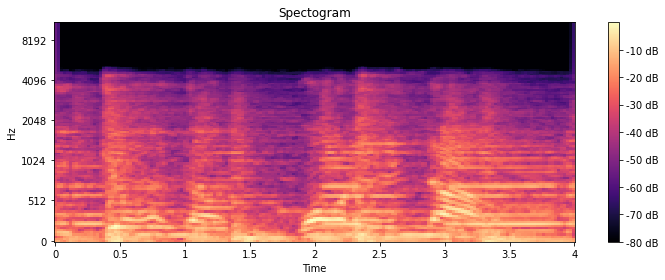

(128, 173)


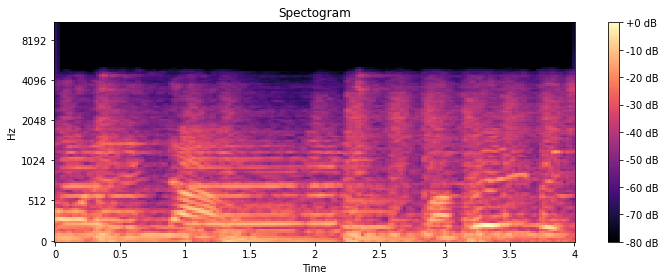

(128, 173)


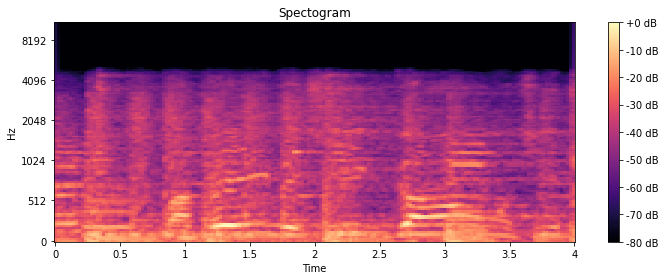

(128, 173)


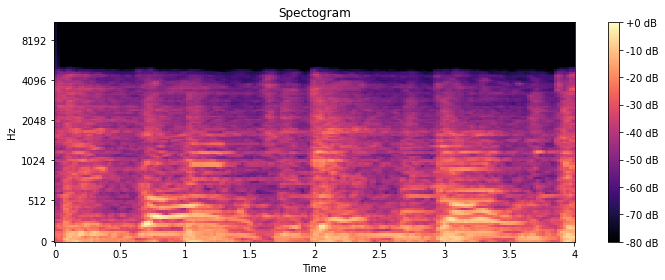

(128, 173)


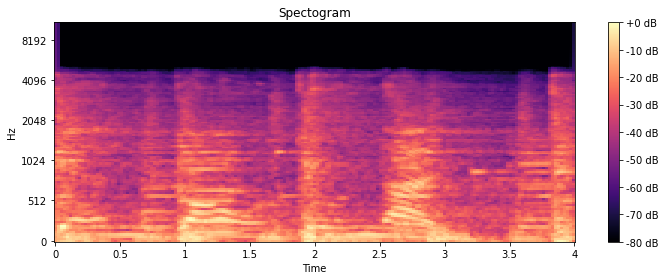

(128, 173)


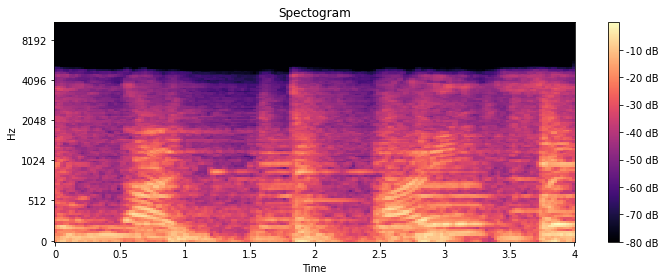

(128, 173)


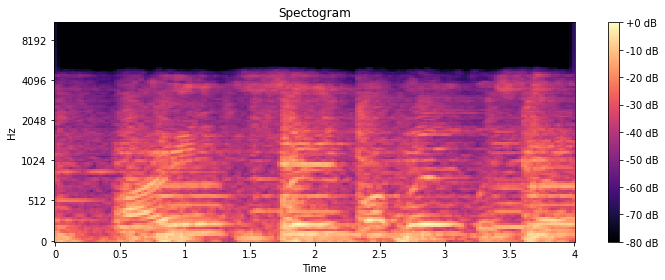

(128, 173)


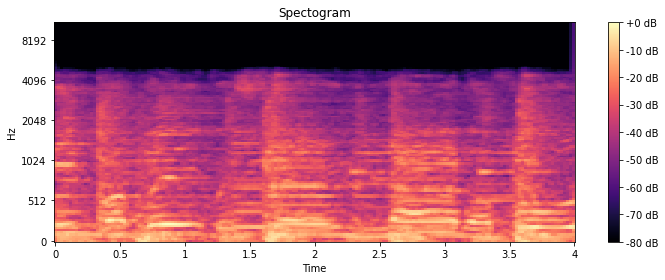

(128, 173)


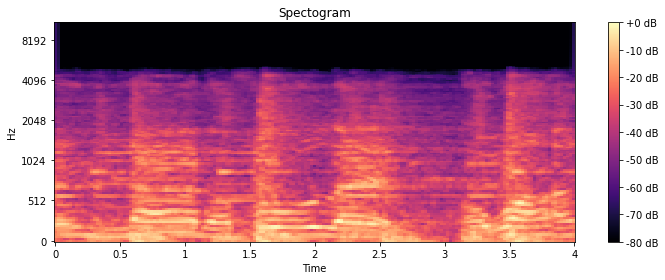

(128, 173)


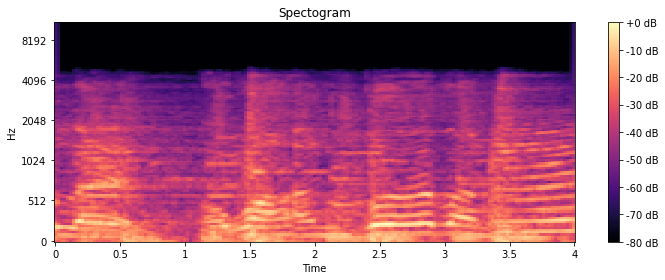

(128, 173)


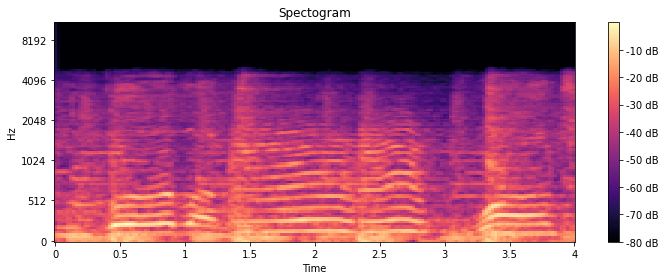

(128, 173)


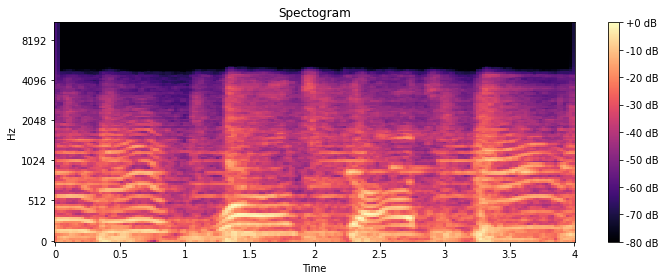

(128, 173)


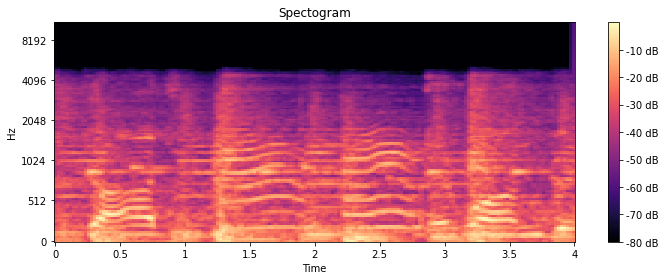

(128, 173)


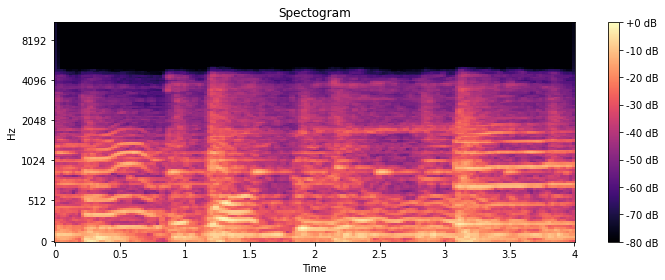

(128, 173)


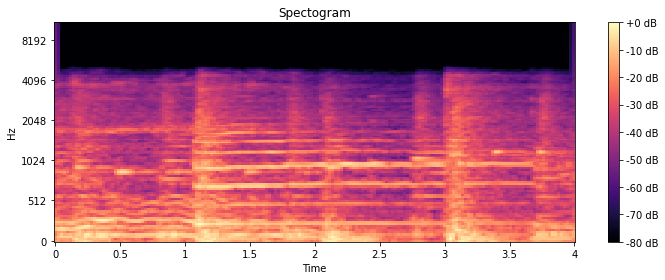

(128, 173)


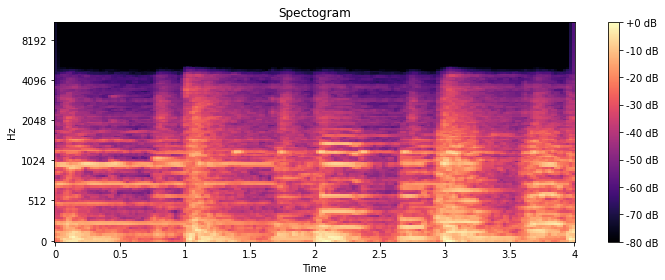

(128, 88)


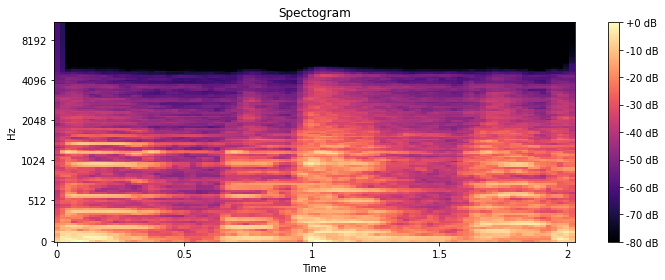

In [8]:
#Spectrogram of Audio chunks
plot_mel_spectogram_chunks(y=x,sr=sr)

In [9]:
data_dir="archive/Data/genres_original"
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [10]:
# Load and preprocess audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150)):
    data = []
    labels = []
    
    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                # Perform preprocessing (e.g., convert to Mel spectrogram and resize)
                # Define the duration of each chunk and overlap
                chunk_duration = 4  # seconds
                overlap_duration = 2  # seconds
                
                # Convert durations to samples
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                # Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
                
                # Iterate over each chunk
                for i in range(num_chunks):
                    # Calculate start and end indices of the chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples
                    
                    # Extract the chunk of audio
                    chunk = audio_data[start:end]
                    
                    # Compute the Mel spectrogram for the chunk
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
                    
                #mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    
    return np.array(data), np.array(labels)

In [ ]:
#split data into training and testing set

data, labels=load_and_preprocess_data(data_dir,classes)


Processing-- blues


In [ ]:
data.shape

In [ ]:
labels.shape


In [ ]:
labels = to_categorical(labels, num_classes=len(classes))  
# Convert labels to one-hot encoding
labels

In [ ]:
labels.shape

In [ ]:
data.shape

In [17]:
data.shape

(14975, 150, 150, 1)

#### Splitting into Training and Testing Dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

#### Building Model

In [19]:
model = tf.keras.models.Sequential()


In [30]:
X_train[0].shape


(150, 150, 1)

In [1]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(150, 150, 1)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

NameError: name 'model' is not defined